In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import os
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D
from keras.applications.densenet import DenseNet121

from keras.layers import GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)  # InceptionV3 default input shape
)


29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define image dimensions for ResNet50 (224x224)
img_height, img_width = 224, 224

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train_test_val/test',
                                                  target_size=(img_height, img_width),
                                                  batch_size=32,
                                                  class_mode='binary')
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train_test_val/train',
                                                   target_size=(img_height, img_width),
                                                   batch_size=32,
                                                   class_mode='binary')

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train_test_val/val',
                                                 target_size=(img_height, img_width),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 176 images belonging to 2 classes.
Found 1226 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [ ]:
from keras import regularizers
model = Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7103169 (27.10 MB)
Trainable params: 65665 (256.50 KB)
Non-trainable params: 7037504 (26.85 MB)
____________

In [ ]:
conv_base.trainable = False

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=2,
    callbacks=[early_stopping]  # Include early stopping callback
)


Epoch 1/20
39/39 - 328s - loss: 0.6575 - accuracy: 0.7007 - val_loss: 0.5266 - val_accuracy: 0.8000 - 328s/epoch - 8s/step
Epoch 2/20
39/39 - 311s - loss: 0.4953 - accuracy: 0.8124 - val_loss: 0.4665 - val_accuracy: 0.8286 - 311s/epoch - 8s/step
Epoch 3/20
39/39 - 299s - loss: 0.4408 - accuracy: 0.8238 - val_loss: 0.4044 - val_accuracy: 0.8514 - 299s/epoch - 8s/step
Epoch 4/20
39/39 - 295s - loss: 0.3977 - accuracy: 0.8507 - val_loss: 0.3579 - val_accuracy: 0.8571 - 295s/epoch - 8s/step
Epoch 5/20
39/39 - 285s - loss: 0.3640 - accuracy: 0.8597 - val_loss: 0.3303 - val_accuracy: 0.8857 - 285s/epoch - 7s/step
Epoch 6/20
39/39 - 297s - loss: 0.3422 - accuracy: 0.8858 - val_loss: 0.3198 - val_accuracy: 0.8800 - 297s/epoch - 8s/step
Epoch 7/20
39/39 - 302s - loss: 0.3165 - accuracy: 0.8915 - val_loss: 0.3127 - val_accuracy: 0.8886 - 302s/epoch - 8s/step
Epoch 8/20
39/39 - 295s - loss: 0.3111 - accuracy: 0.8956 - val_loss: 0.2811 - val_accuracy: 0.9171 - 295s/epoch - 8s/step
Epoch 9/20
39/39

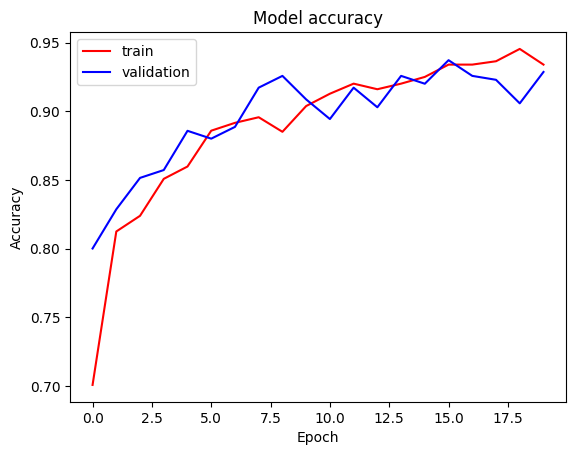

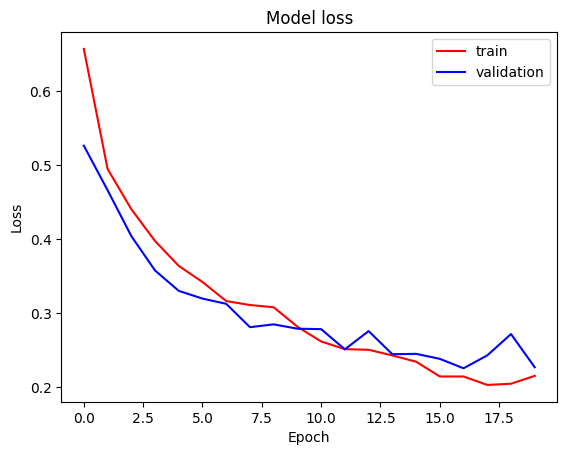

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Load the test data
test_data_path = '/content/drive/MyDrive/Colab Notebooks/train_test_val/test'

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=(img_height, img_width),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  shuffle=False)  # Ensure the same order as labels for evaluation

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 176 images belonging to 2 classes.
6/6 [==============================] - 49s 8s/step - loss: 0.1908 - accuracy: 0.9602
Test Loss: 0.19075709581375122
Test Accuracy: 0.9602272510528564


In [ ]:
# Define the path where you want to save the model
model_save_path = '/content/drive/MyDrive/Colab Notebooks/train_test_val'

# Check if the directory exists, if not, create it
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Save the model
model.save(os.path.join(model_save_path, 'Dense121_64_model.h5'))

print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


1/1 [==============================] - 0s 183ms/step


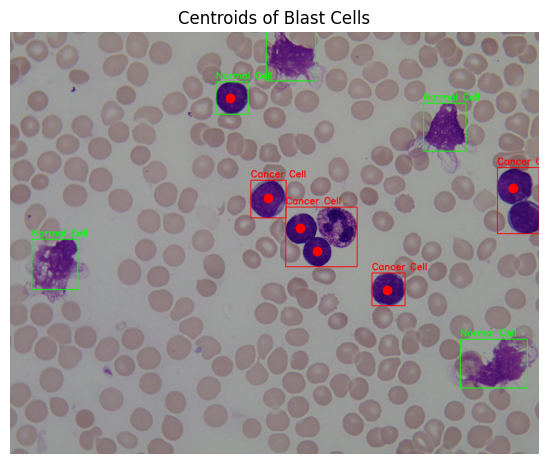

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the VGG16 model
model = load_model('/content/drive/MyDrive/Colab Notebooks/train_test_val/Dense121_64_model.h5')

# Function to preprocess the input image
def preprocess_image(image):
    # Resize the image to the required input shape of the VGG16 model (e.g., 224x224 for VGG16)
    image = cv2.resize(image, (224, 224))
    # Convert the image to the format expected by the VGG16 model (RGB and float32)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    # Normalize the image
    image /= 255.0
    # Expand the dimensions to match the input shape of the model (add batch dimension)
    image = np.expand_dims(image, axis=0)
    return image

# Function to classify cells in the image while ignoring smaller particles
def classify_cells(image, model, min_cell_area=500):
    # Convert image to grayscale for easier processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Threshold the image to obtain binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # Ignore contours smaller than min_cell_area (considered as noise or non-cell particles)
        if area < min_cell_area:
            continue
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)
        # Extract the cell from the image
        cell = image[y:y+h, x:x+w]
        # Preprocess the cell image
        preprocessed_cell = preprocess_image(cell)
        # Perform prediction using the model
        predictions = model.predict(preprocessed_cell)
        # Interpret the predictions (assuming binary classification)
        cell_class = "Normal Cell" if predictions[0][0] > 0.5 else "Cancer Cell"
        # Draw bounding box and label on the original image
        if cell_class == "Cancer Cell":
            color = (0, 0, 255)  # Red color for cancer cells
        else:
            color = (0, 255, 0)  # Green color for normal cells
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        # Increase font size for cell classification label
        font_scale = 1.0
        font_thickness = 2
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, cell_class, (x, y - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

    return image

# Function to plot image and centroids side by side
def plot_images_with_centroids(image, centroids):
    plt.figure(figsize=(15, 8))

    # Plot the centroids
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for centroid in centroids:
        plt.plot(centroid[0], centroid[1], 'ro')  # Plot centroids as red dots
    plt.title('Centroids of Blast Cells')
    plt.axis('off')

    plt.show()

# Path to the image to be predicted
image_path = '/content/drive/MyDrive/Colab Notebooks/train_test_val/Im004_1.jpg'

# Read the full-size microscopic image
image = cv2.imread(image_path)

# Classify cells in the image
classified_image = classify_cells(image, model)

# Read centroid coordinates from the file
centroid_file = '/content/drive/MyDrive/Colab Notebooks/xyc/Im004_1.xyc'
centroids = []
with open(centroid_file, 'r') as file:
    for line in file:
        x, y = map(int, line.split())
        centroids.append((x, y))

# Plot images side by side
plot_images_with_centroids(classified_image, centroids)
